In [1]:
from utils import *
from model import *

2025-04-17 08:59:08.848664: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-17 08:59:09.345027: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/supernova/anaconda3/envs/tensorflow/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/home/supernova/

In [2]:
test_TCN_model = TCN_model(model_path=r'./model/', model_name='TCN4Flare_128_3_256_1_0.2_9:1_recall.keras')

2025-04-17 08:59:12.253357: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-17 08:59:12.272000: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-17 08:59:12.272222: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 2)]         0         
                                                                 
 tcn (TCN)                   (None, 128)               843648    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 843,777
Trainable params: 843,777
Non-trainable params: 0
_________________________________________________________________


In [3]:
# load test data
test_dataset_all = np.load(r'./data/test_data_99:1.npz')
test_dataset = test_dataset_all['data']
test_labels = test_dataset_all['labels']
print(test_dataset.shape)
print(test_labels.shape)

(9000, 2412, 3)
(9000,)


In [ ]:
# test predict method
y_pred, y_prob = test_TCN_model.predict(test_dataset)
print(len(np.where(y_pred == 1)[0]))

2025-04-17 08:59:22.569836: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2025-04-17 08:59:23.494367: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600


9000/9000 [==============================] - 103s 11ms/step


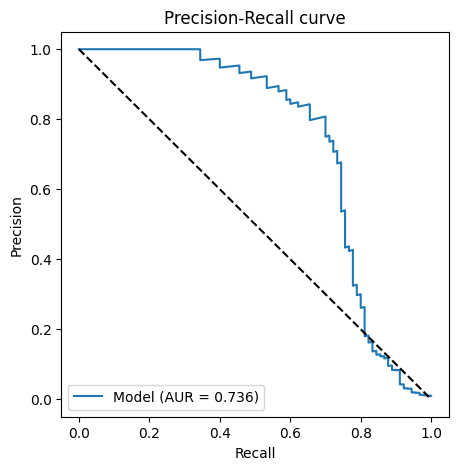

The optimal threshold to maximize F1 Score is: 0.74913436
The optimal F1 Score is: 0.7499995025513504
The optimal Recall is: 0.7
The optimal Precision is: 0.8076923076923077


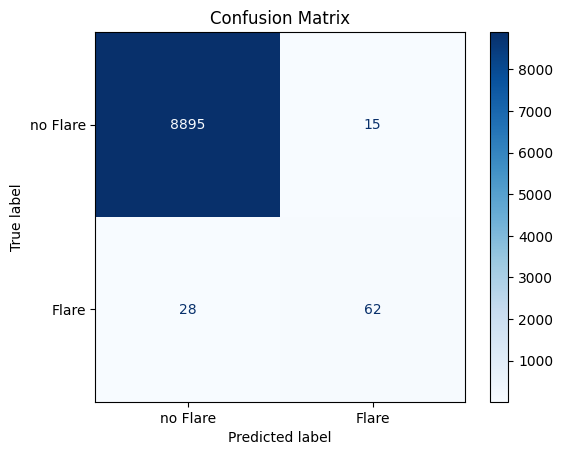

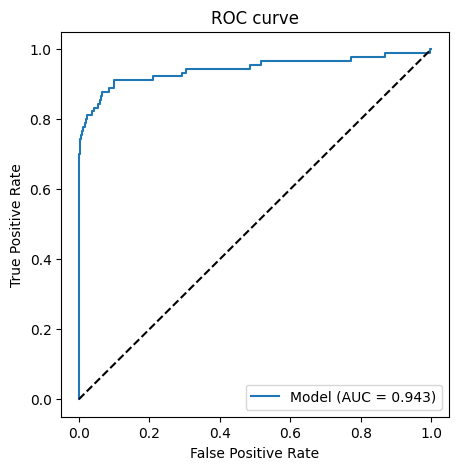

In [4]:
# test evaluate method, evalute one model on test dataset
test_TCN_model.evaluate(test_dataset, test_labels, plot_cm=True, plot_roc=True, plot_pr=True)

In [ ]:
# build custom TCN model
custom_model, custom_model_name = test_TCN_model.build_custom_tcn_model(input_shape=(None, 2), 
                                                                     num_filters=64, 
                                                                     kernel_size=3, 
                                                                     dilations=[1, 2, 4, 8, 16, 32, 64, 128, 256], 
                                                                     dropout_rate=0.2, 
                                                                     nb_stacks=1)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 2)]         0         
                                                                 
 tcn (TCN)                   (None, 64)                212928    
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 212,993
Trainable params: 212,993
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# load train dataset
train_dataset_all = np.load(r'./data/train_data_9:1.npz')
train_dataset = train_dataset_all['data']
train_labels = train_dataset_all['labels']
print(train_dataset.shape, train_labels.shape)

(20000, 2167, 3) (20000,)


In [ ]:
# train custom TCN model
test_TCN_model.train(train_dataset, train_labels, test_dataset, test_labels,
                     model_path=r'./model/', 
                     log_dir=r'./logs/fit/', 
                     epochs=100, 
                     early_stop = True)

成功加载模型, load model successfully: TCN4Flare_128_3_256_1_0.2_9:1
成功加载模型, load model successfully: TCN4Flare_128_3_256_1_0.2_9:1_recall
成功加载模型, load model successfully: TCN4Flare_128_3_256_1_0.2_9:1_f1


2025-04-17 09:02:14.723567: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


9000/9000 [==============================] - 55s 6ms/step
The optimal threshold to maximize F1 Score for TCN4Flare_128_3_256_1_0.2_9:1 is: 0.6225446
The optimal F1 Score for TCN4Flare_128_3_256_1_0.2_9:1 is: 0.7674413615471064
The optimal Recall for TCN4Flare_128_3_256_1_0.2_9:1 is: 0.7333333333333333
The optimal Precision for TCN4Flare_128_3_256_1_0.2_9:1 is: 0.8048780487804879


2025-04-17 09:03:11.459382: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


9000/9000 [==============================] - 55s 6ms/step
The optimal threshold to maximize F1 Score for TCN4Flare_128_3_256_1_0.2_9:1_recall is: 0.74913436
The optimal F1 Score for TCN4Flare_128_3_256_1_0.2_9:1_recall is: 0.7499995025513504
The optimal Recall for TCN4Flare_128_3_256_1_0.2_9:1_recall is: 0.7
The optimal Precision for TCN4Flare_128_3_256_1_0.2_9:1_recall is: 0.8076923076923077


2025-04-17 09:04:08.281567: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


9000/9000 [==============================] - 55s 6ms/step
The optimal threshold to maximize F1 Score for TCN4Flare_128_3_256_1_0.2_9:1_f1 is: 0.5619879
The optimal F1 Score for TCN4Flare_128_3_256_1_0.2_9:1_f1 is: 0.7631574117039068
The optimal Recall for TCN4Flare_128_3_256_1_0.2_9:1_f1 is: 0.6444444444444445
The optimal Precision for TCN4Flare_128_3_256_1_0.2_9:1_f1 is: 0.9354838709677419


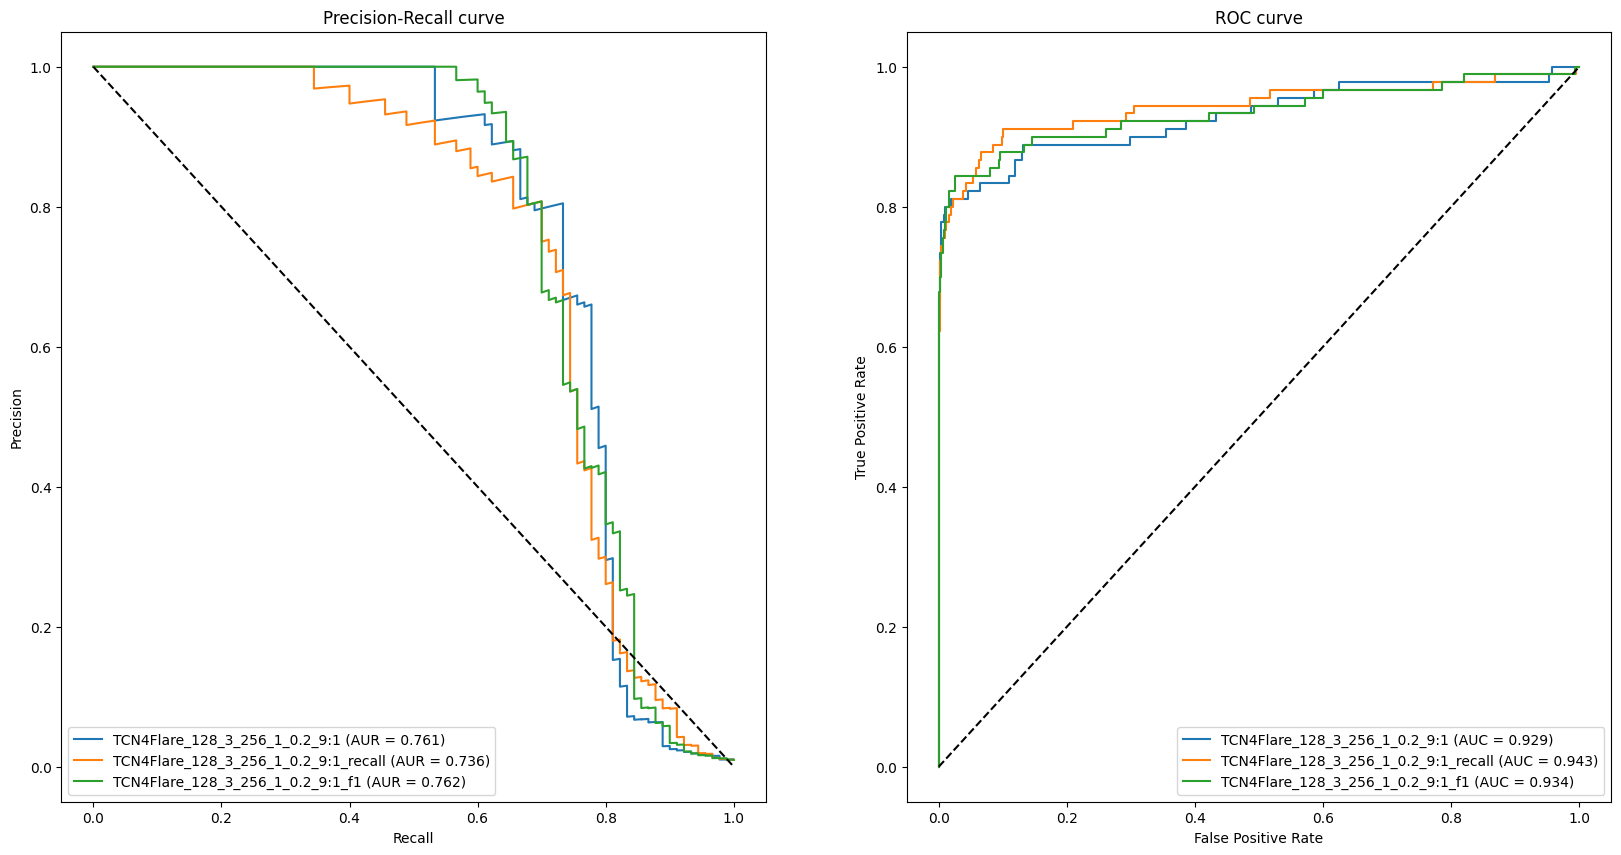

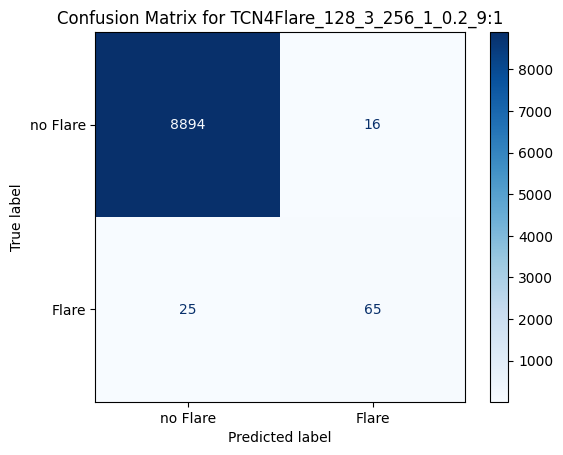

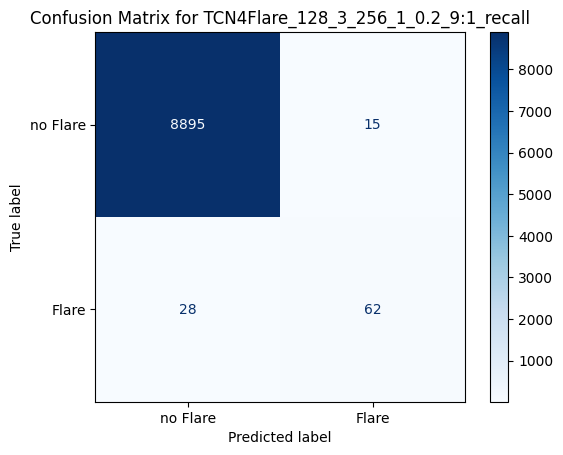

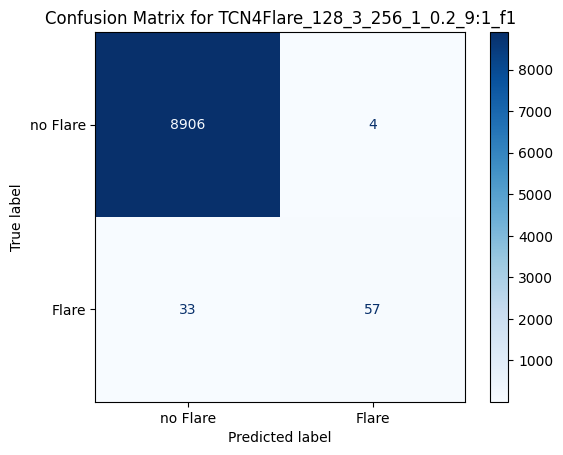

In [6]:
# compare models
model_lists = ['TCN4Flare_128_3_256_1_0.2_9:1', 'TCN4Flare_128_3_256_1_0.2_9:1_recall', 'TCN4Flare_128_3_256_1_0.2_9:1_f1']
test_TCN_model.compare_models(model_lists, test_dataset, test_labels, plot_cm=True, plot_roc=True, plot_pr=True, fig_name='different_evaluation_cretia')